<h2>ARC Liver-Spleen Project - CHAOS Datasheet Summary</h2>
Zachary Taylor

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install matplotlib-venn
import matplotlib_venn
from matplotlib_venn import venn3
import os
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
df = pd.read_csv("chaos_summary.csv")
dfsub = df[["ID", "sequence", "spleen_volume", "lkidney_volume"]]
total = dfsub["ID"].count()
print("Total Scans: ",total)

#Categories: Sequence (CT vs T1DUAL (In_Phase + Out_Phase) vs MR T2SPIR), Liver/Spleen Mask (Y/N), Kidney Mask (Y/N)

print(dfsub.describe())

print("missing sequence: ",(total-dfsub['sequence'].count()))


Total Scans:  160
       spleen_volume  lkidney_volume
count   1.200000e+02    4.600000e+01
mean    7.535740e+05    2.915293e+05
std     5.958845e+05    5.066627e+05
min     9.312243e+04    3.915977e+02
25%     2.612221e+05    1.340327e+05
50%     4.988007e+05    1.626806e+05
75%     1.271039e+06    1.922637e+05
max     2.487988e+06    2.795406e+06
missing sequence:  0


<h3>Categorical Analysis</h3>

In [3]:
print("\nSequence Count:")

sequencecount = dfsub["sequence"].value_counts(dropna=False)
sequenceperc = dfsub["sequence"].value_counts(dropna=False, normalize=True)

ct = t1dual = t2spir = otherseq = miss = unknownseq = 0
labelarr=sequencecount.index

i=0
#while i<sequencecount.size:
#    if(not isinstance(labelarr[i], str)):
#        unknownseq = unknownseq + sequencecount[i]
#    elif((labelarr[i].find("CT")!= -1)):
#        ct = ct + sequencecount[i]    
#    elif((labelarr[i].find("T1DUAL")!= -1)):
#        t1dual = t1dual + sequencecount[i]
#    elif((labelarr[i].find("T2SPIR")!= -1)):
#        t2spir = t2spir + sequencecount[i]
#    elif((labelarr[i]=="missing")):
#        miss = miss + sequencecount[i]
#    elif((labelarr[i]=="unknown")):
#        unknownseq = unknownseq + sequencecount[i]
#    else:
#        otherseq = otherseq + sequencecount[i]
#    i = i + 1
        
#filteredseq = {'CT':ct, 'T1DUAL':t1dual, 'T2SPIR':t2spir, 'Other':otherseq, 'Missing':miss, 'Unknown':unknownseq}

#arrseq = np.array([ct, t1dual, t2spir])
#arrseqlabels = ['CT', 'T1 DUAL', 'T2 SPIR']
#totalseq = arrseq.sum()
#percseq = arrseq/totalseq

print('\nTOTAL:',dfsub['sequence'].count())
print(pd.concat([sequencecount,sequenceperc], axis=1,keys=['counts', '%']))
#print(pd.concat([pd.DataFrame(arrseqlabels),pd.DataFrame(arrseq),pd.DataFrame(percseq)], axis=1,keys=['Sequence','counts', '%']))

print('\nMasking:')

spleencount = dfsub["spleen_volume"].count()
spleenmissing = total - spleencount
percspleen = [spleencount / total , spleenmissing / total]

arrspleen = np.array([spleencount, spleenmissing])
arrspleenlabels = ['Spleen Mask Found', 'Spleen Mask Missing']

kidneycount = dfsub["lkidney_volume"].count()
kidneymissing = total - kidneycount
perckidney = [kidneycount / total , kidneymissing / total]

arrkidney = np.array([kidneycount, kidneymissing])
arrkidneylabels = ['Kidney Mask Found', 'Kidney Mask Missing']
#kidneydf = pd.DataFrame({"Kidney Mask Found": np.array([kidneycount]), "Kidney Mask Missing": np.array([kidneymissing])})


print("\n Spleen")
print(pd.concat([pd.DataFrame(arrspleenlabels),pd.DataFrame(arrspleen),pd.DataFrame(percspleen)], axis=1,keys=['','counts', '%']))
print("\n Kidney")
print(pd.concat([pd.DataFrame(arrkidneylabels),pd.DataFrame(arrkidney),pd.DataFrame(perckidney)],axis=1,keys=['','counts', '%']))


Sequence Count:

TOTAL: 160
                 counts     %
T1DUAL_OutPhase      40  0.25
CT                   40  0.25
T2SPIR               40  0.25
T1DUAL_InPhase       40  0.25

Masking:

 Spleen
                       counts     %
                     0      0     0
0    Spleen Mask Found    120  0.75
1  Spleen Mask Missing     40  0.25

 Kidney
                       counts       %
                     0      0       0
0    Kidney Mask Found     46  0.2875
1  Kidney Mask Missing    114  0.7125


<h3>Figures and Graphs<h3>

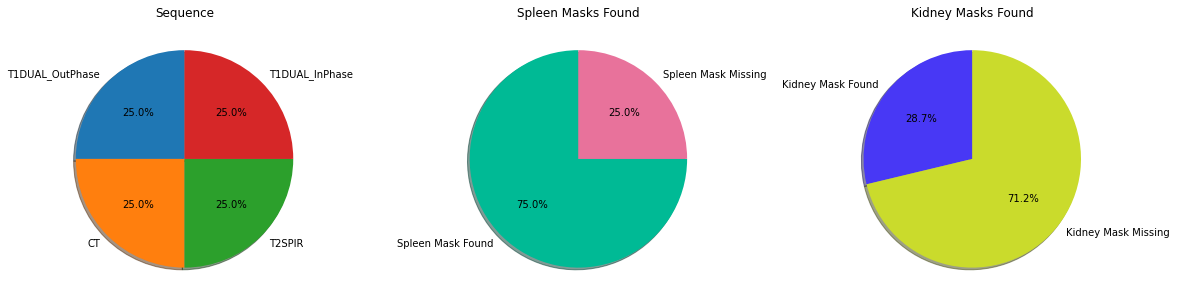

In [4]:
figt, axt = plt.subplots(1,3, figsize = (20,5))

axt[0].pie(sequencecount, shadow=True, labels=labelarr, autopct='%1.1f%%', startangle=90)

axt[0].set_title('Sequence')

colorssp = ['#00ba95','#e8729b']
axt[1].pie(arrspleen, labels=arrspleenlabels,colors=colorssp,autopct='%1.1f%%',
        shadow=True, startangle=90)
axt[1].set_title('Spleen Masks Found')
colorskid = ['#4838f5','#cadb2c']
axt[2].pie(arrkidney, labels=arrkidneylabels,colors=colorskid,autopct='%1.1f%%',
        shadow=True, startangle=90)
axt[2].set_title('Kidney Masks Found')

plt.show()
